### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset

### Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None) # # For display maximum column
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (614, 13)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



#### There is null value

### Information about dataset

In [5]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


#### Categorical data present in our data set

### Statistics of Data

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Outliers are present in our data set

### Drop Unwanted Columns

In [7]:
df = df.drop('Loan_ID', axis = 1)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Analysis of Null value

In [8]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



### Gender column

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Gender'].dtype

dtype('O')

#### Approach : Gender column is categorical value so, we fill null value with mode

### Married column

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Married'].dtype

dtype('O')

#### Approach : Married column is categorical value so, we fill null value with mode

### Dependents columns

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df['Dependents'].dtype

dtype('O')

In [15]:
df['Dependents'] = df['Dependents'].replace(to_replace= '3+', value = 3)

In [16]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### Approach 1 : In oreder to do Dependents column analysis we found "3+" value which not acceptable to do analysis so we replace with "3"

#### Approach 2 : Dependents column is categorical value so, we fill null value with mode

### Self Employed columns

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Self_Employed'].dtype

dtype('O')

#### Approach : Self Employed column is categorical value so, we fill null value with mode

### Loan Amount column

In [19]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [20]:
df['LoanAmount'].dtype

dtype('float64')

#### Approach : Loan Amount column is continuous value so, we fill null value with mean

### Loan Amount Term column

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df['Loan_Amount_Term'].dtype

dtype('float64')

#### Approach : Loan Amount Term column is continuous value so, we fill null value with mean

### Credit History column

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df['Credit_History'].dtype

dtype('float64')

#### Approach : Credit History column is categorical value so, we fill null value with mode

### Fill NaN

In [25]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [26]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64



#### There is no null value

### Analysis of data respect to Loan Status

In [27]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


### Gender column

In [28]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [29]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

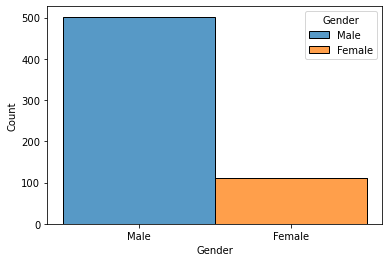

In [30]:
sns.histplot(binwidth=0.5, x="Gender", hue="Gender", data=df, stat="count", multiple="stack")
plt.show()

#### Male is highest in number

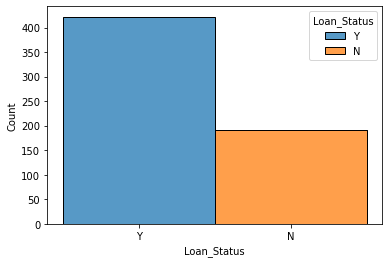

In [31]:
sns.histplot(binwidth=0.5, x="Loan_Status", hue="Loan_Status", data=df, stat="count", multiple="stack")
plt.show()

#### Repayment is high 👍👍

In [32]:
gn = df.groupby('Gender')['Loan_Status'].value_counts()
gn

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

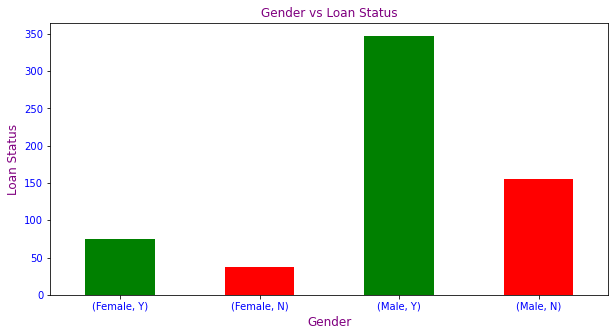

In [33]:
gn.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Gender', c = 'purple', fontsize = 12)
plt.ylabel('Loan Status', c = 'purple', fontsize = 12 )
plt.title('Gender vs Loan Status', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Above plot shows Repayment of Loan in male is higest 347 👍 and in female is 75 which low as compare to male 👎

### Married column

In [34]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

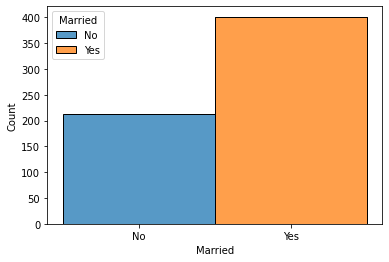

In [35]:
sns.histplot(binwidth=0.5, x="Married", hue="Married", data=df, stat="count", multiple="stack")
plt.show()

#### Above plot shows no of Married person is highest 

In [36]:
m = df.groupby('Married')['Loan_Status'].value_counts()
m

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64

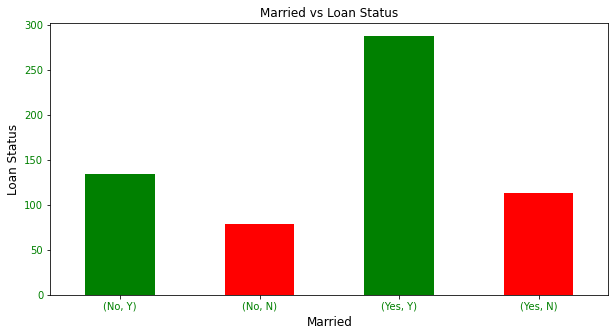

In [37]:
m.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Married', c = 'k', fontsize = 12)
plt.ylabel('Loan Status', c = 'k', fontsize = 12 )
plt.title('Married vs Loan Status', c = 'k', fontsize = 12)
plt.xticks(c = 'g')
plt.yticks(c = 'g')
plt.show()

#### Above plot shows Repayment of Loan in Married person is higest 288 👍 and In Not Married is 134 which low as compare to Married person 👎

### Dependents column

In [38]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [39]:
d = df.groupby('Dependents')['Loan_Status'].value_counts()
d

Dependents  Loan_Status
3           Y               33
            N               18
0           Y              247
            N              113
1           Y               66
            N               36
2           Y               76
            N               25
Name: Loan_Status, dtype: int64

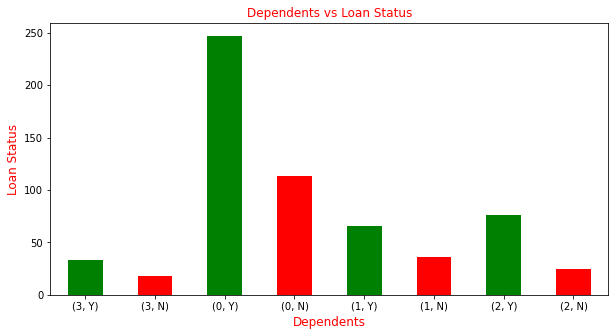

In [40]:
d.plot.bar(figsize = (10,5), rot = 360, color = ['g', 'r'])
plt.xlabel('Dependents', c = 'r', fontsize = 12)
plt.ylabel('Loan Status', c = 'r', fontsize = 12 )
plt.title('Dependents vs Loan Status', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows Repayment of Loan in Dependents "0" is higest 247 👍 and in Dependents "3" is 18 which low as compare to Dependents "0" 👎

### Education column

In [41]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [42]:
g = df.groupby('Education')['Loan_Status'].value_counts()
g 

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

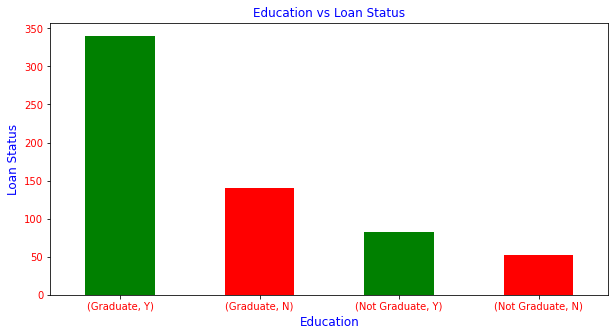

In [43]:
g.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Education', c = 'b', fontsize = 12)
plt.ylabel('Loan Status', c = 'b', fontsize = 12 )
plt.title('Education vs Loan Status', c = 'b', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Above plot shows Repayment of Loan in Graduate person is higest 340 👍 and in Not Graduate person is 82 which low as compare to Graduate person 👎

### Self Employed column

In [44]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [45]:
s = df.groupby('Self_Employed')['Loan_Status'].value_counts()
s

Self_Employed  Loan_Status
No             Y              366
               N              166
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

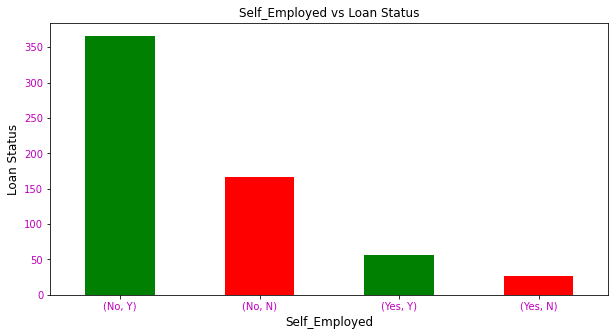

In [46]:
s.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Self_Employed', c = 'k', fontsize = 12)
plt.ylabel('Loan Status', c = 'k', fontsize = 12 )
plt.title('Self_Employed vs Loan Status', c = 'k', fontsize = 12)
plt.xticks(c = 'm')
plt.yticks(c = 'm')
plt.show()

#### Above plot shows Repayment of Loan in Self Employed person is 56 which low 👎 😔

### Applicant Income column

In [47]:
df['ApplicantIncome'].value_counts()

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [48]:
a = df.groupby('ApplicantIncome')['Loan_Status'].value_counts()
a

ApplicantIncome  Loan_Status
150              N              1
210              Y              1
416              N              1
645              Y              1
674              Y              1
                               ..
39147            Y              1
39999            Y              1
51763            Y              1
63337            Y              1
81000            N              1
Name: Loan_Status, Length: 536, dtype: int64

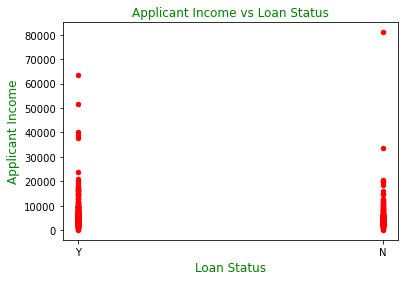

In [49]:
df.plot.scatter(x = 'Loan_Status', y = 'ApplicantIncome', c = 'r')
plt.xlabel('Loan Status', c = 'g', fontsize = 12)
plt.ylabel('Applicant Income', c = 'g', fontsize = 12 )
plt.title('Applicant Income vs Loan Status', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows Applicant Income whoes earning in between ( 210 to 65000 ) higest 👍 

### Loan Amount column

In [50]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [51]:
am = df.groupby('LoanAmount')['Loan_Status'].value_counts()
am

LoanAmount  Loan_Status
9.0         N              1
17.0        Y              1
25.0        Y              2
26.0        Y              1
30.0        Y              2
                          ..
500.0       N              1
570.0       N              1
600.0       Y              2
650.0       Y              1
700.0       Y              1
Name: Loan_Status, Length: 282, dtype: int64

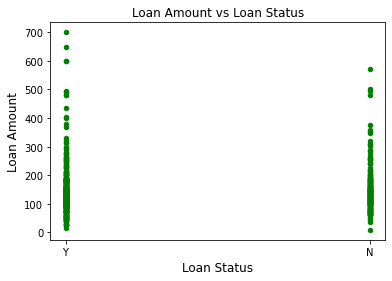

In [52]:
df.plot.scatter(x = 'Loan_Status', y = 'LoanAmount', c = 'g')
plt.xlabel('Loan Status', c = 'k', fontsize = 12)
plt.ylabel('Loan Amount', c = 'k', fontsize = 12 )
plt.title('Loan Amount vs Loan Status', c = 'k', fontsize = 12)
plt.show()

#### Above plot shows Loan amount in between ( 17 to 700 ) higest 👍

### Property Area column

In [53]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [54]:
pa = df.groupby('Property_Area')['Loan_Status'].value_counts()
pa

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

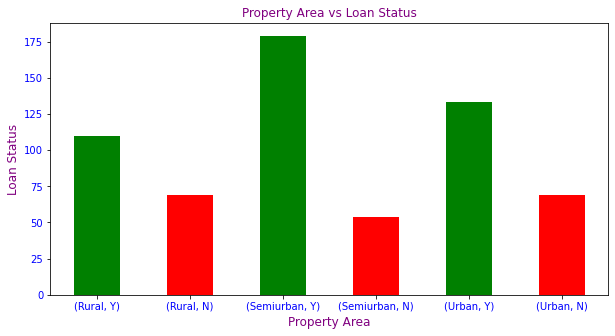

In [55]:
pa.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Property Area', c = 'purple', fontsize = 12)
plt.ylabel('Loan Status', c = 'purple', fontsize = 12 )
plt.title('Property Area vs Loan Status', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Above plot shows Repayment of Loan in Semi urban is higest 179  👍  and lowest is 54  👎 

#### Hypothesis : Applicant whoes gender is Male, Graduated, Married, Annual Income in between ( 210 to 65000) and lived in Semi Urban area higest chance of Loan Repayment

### Encoding columns

In [56]:
le = LabelEncoder()

In [57]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [58]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [59]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB
None


In [60]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


#### All columns are encoded

### Data distribution and checking outliers and skewness

---------------------
Distribution Plot :- 
---------------------


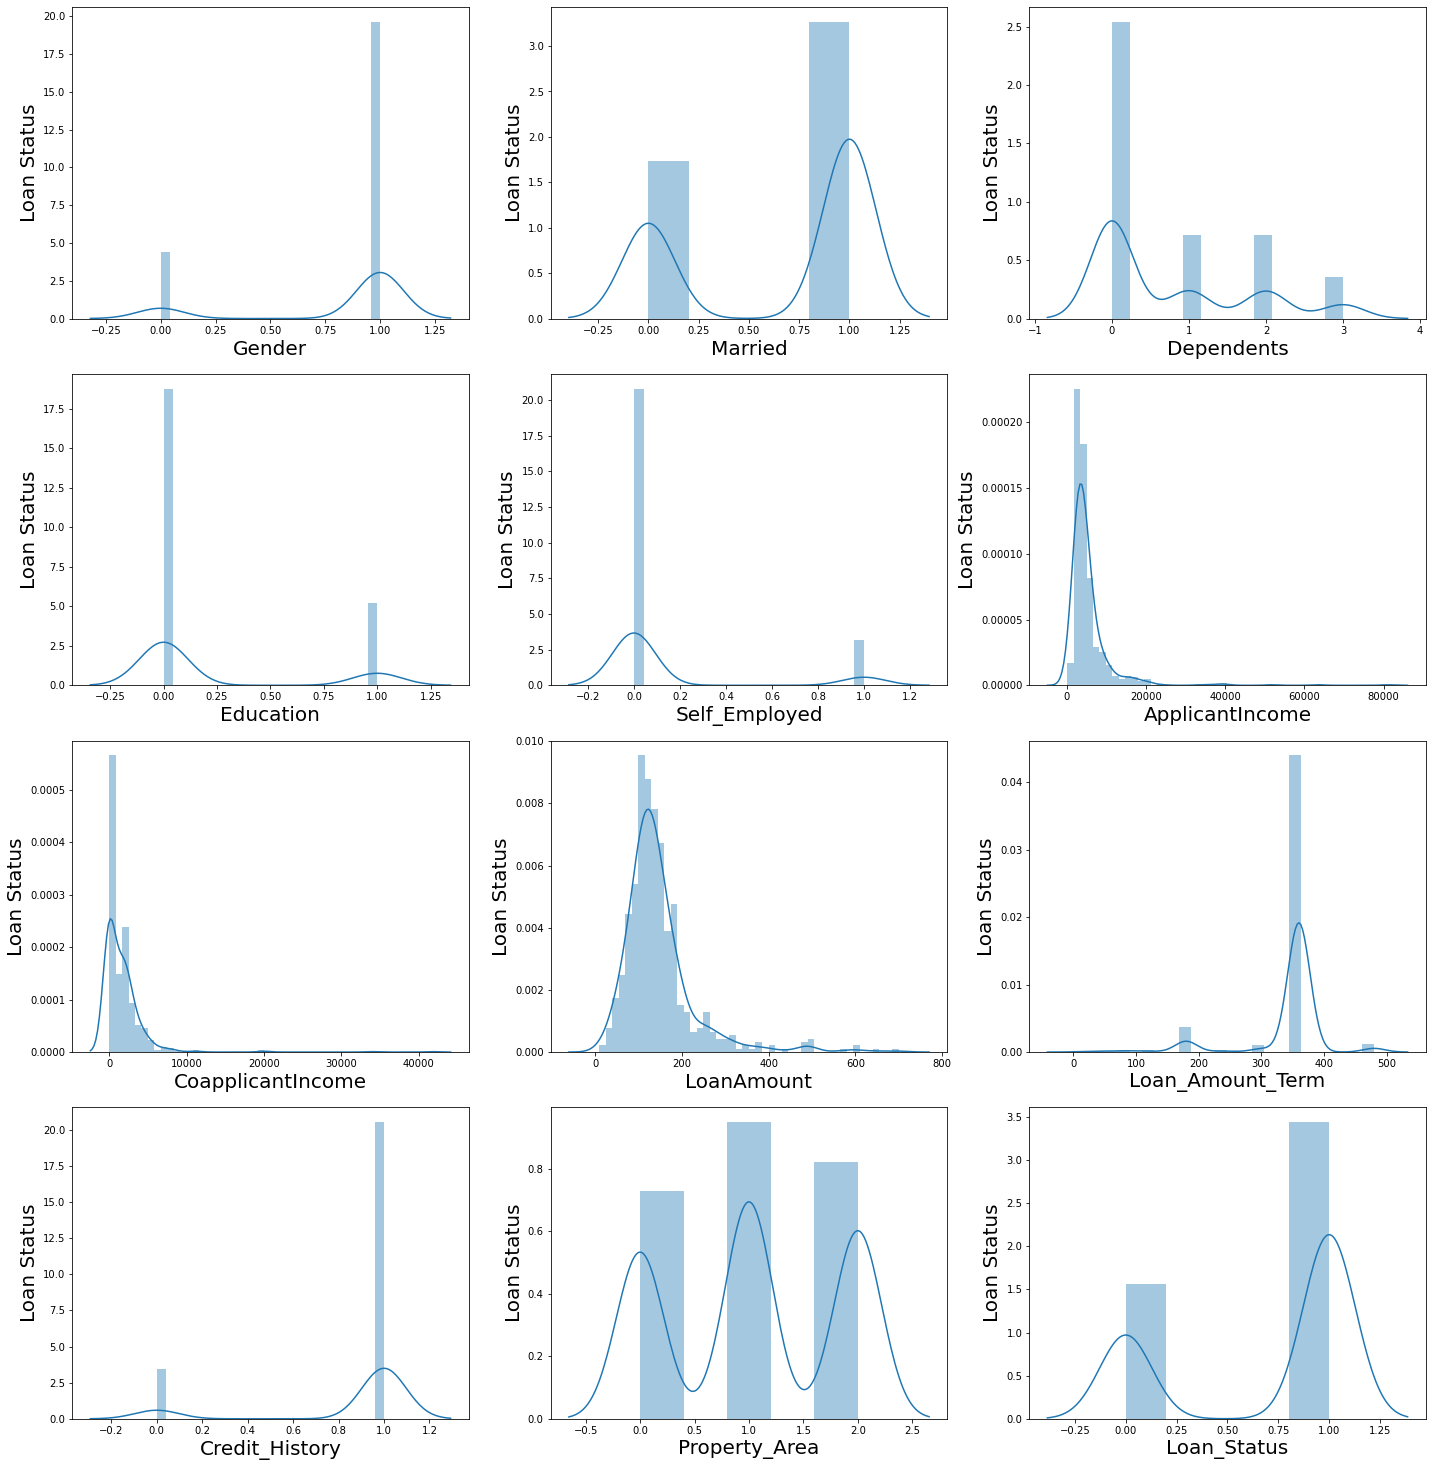

In [61]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Loan Status', fontsize = 20)
    plotnumber +=1
plt.tight_layout()

In [62]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

#### Data has outliers and skewness

### Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


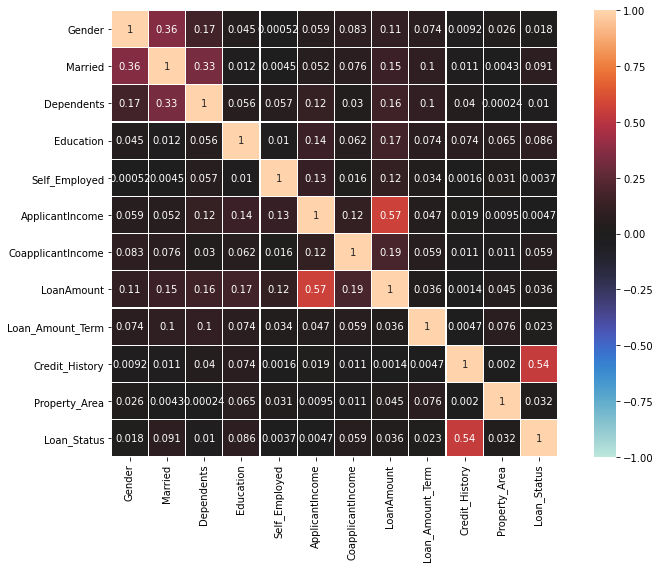

In [63]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (11,8))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### Loan Amount has highest corelation

### Removing Outliers 

In [64]:
# we are removing the top 2% data from the Gender column
q = df['Gender'].quantile(0.99)
data_cleaned = df[df['Gender']<q]
# we are removing the top 2% data from the Dependents column
q = df['Dependents'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Dependents']<q]
# we are removing the top 2% data from the free Self_Employed column
q = df['Self_Employed'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Self_Employed']<q]
# we are removing the top 2% data from the ApplicantIncome column
q = df['ApplicantIncome'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['ApplicantIncome']<q]
# we are removing the top 2% data from the CoapplicantIncome column
q = df['CoapplicantIncome'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['CoapplicantIncome']<q]
# we are removing the top 2% data from the LoanAmount column
q = df['LoanAmount'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['LoanAmount']<q]
# we are removing the top 2% data from the Loan_Amount_Term column
q = df['Loan_Amount_Term'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Loan_Amount_Term']<q]
# we are removing the top 2% data from the Credit_History column
q = df['Credit_History'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Credit_History']<q]

### Checking Outliers and skewness removed or not

---------------------
Distribution Plot :- 
---------------------


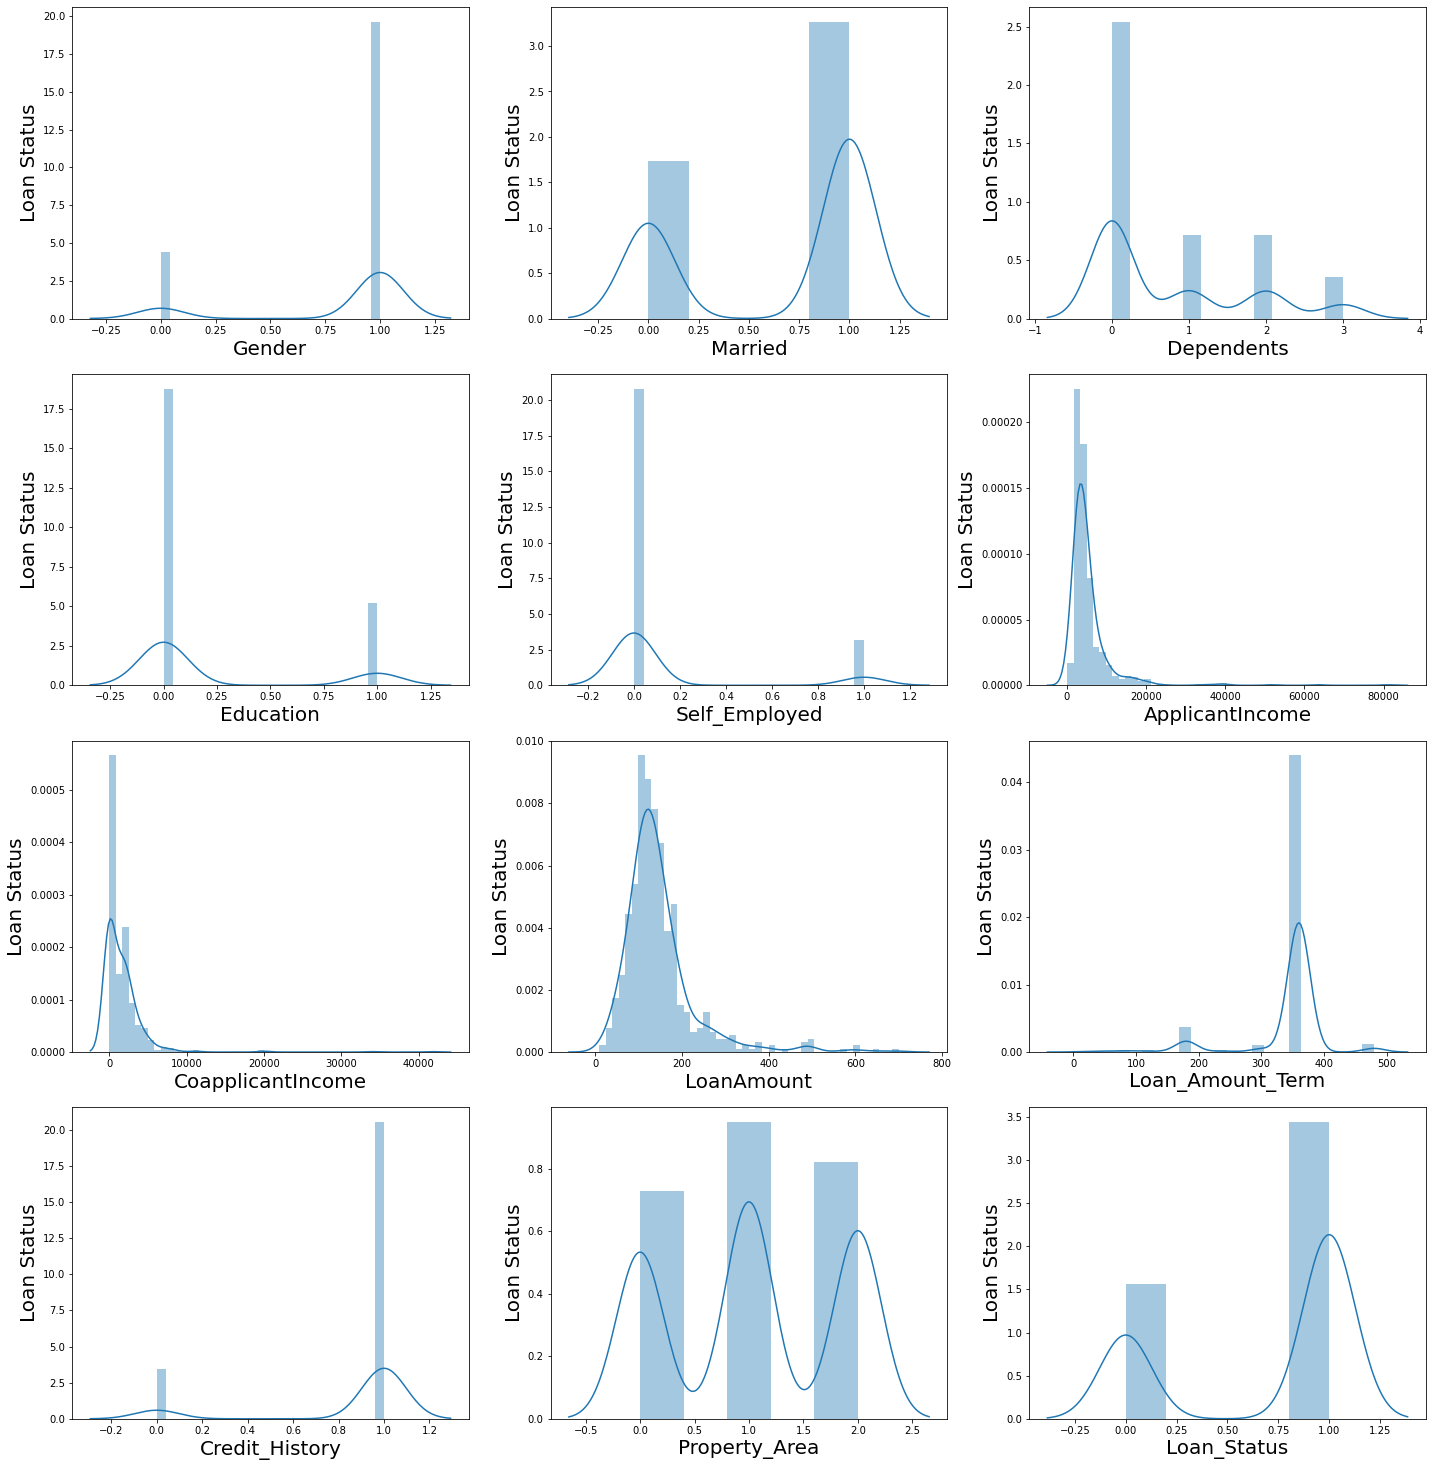

In [65]:
# Let' see outliers are removed in columns or not.
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Loan Status', fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Outliers are removed

### Spliting Dataset into features and label

In [66]:
x = df.drop('Loan_Status', axis = 1)
y = df. Loan_Status
print('Data has been splited')

Data has been splited


-----------------
Scatter Plot :-
-----------------


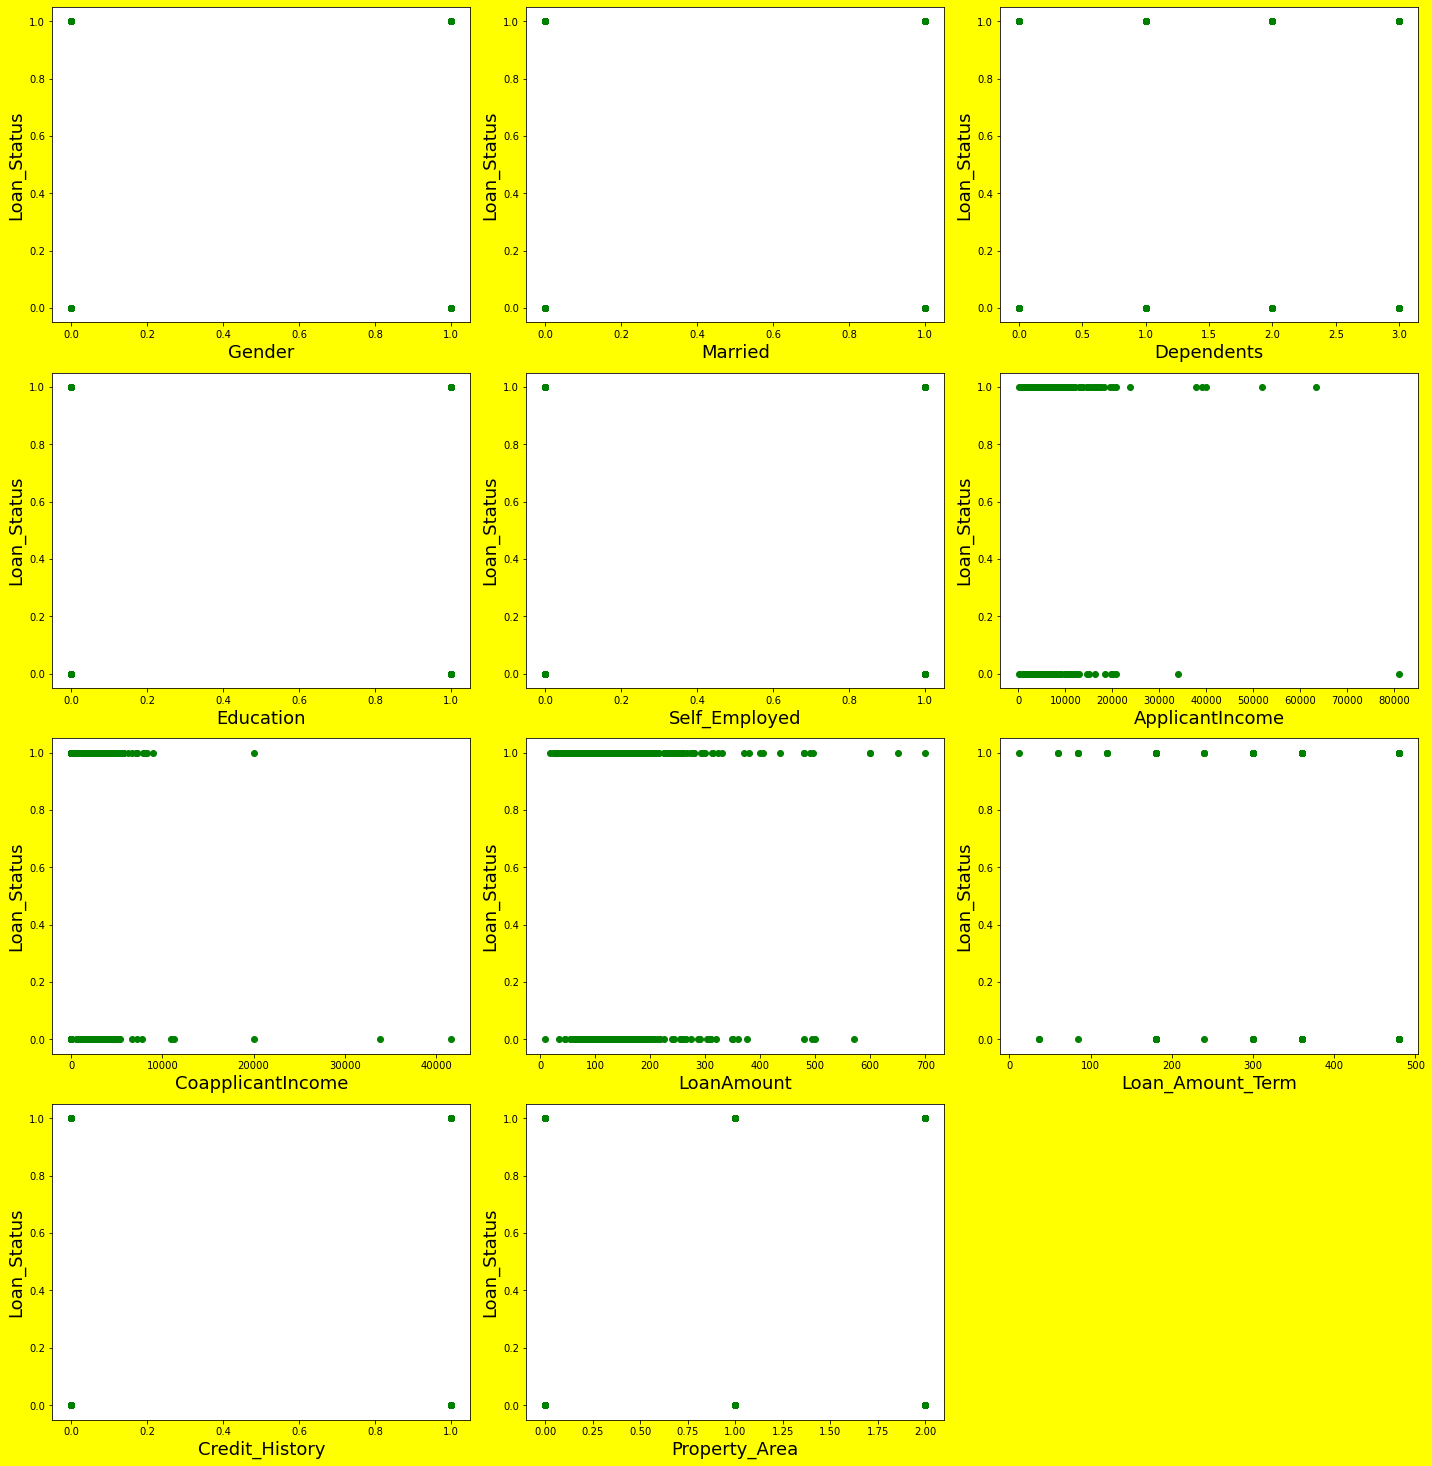

In [67]:
# Let' see relation between features and label.
print('-----------------')
print('Scatter Plot :-')
print('-----------------')

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <=15:
        ax = plt.subplot(5,3, plotnumber)
        plt.scatter(x[column],y, c = 'g')
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Loan_Status', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

### Checking for class imbalance

In [68]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### Class are not balanced

### Handling Class Imbalance

In [69]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [70]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
0    422
1    422
Name: Loan_Status, dtype: int64
---------------------


### Data Scaling

In [71]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

#### Data has been scaled

### Split data into train and test. Model will be bulit on training data and tested on test data

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [73]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [74]:
bag_dt.oob_score

True

In [75]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 0.8056872037914692


In [76]:
y_pred = bag_dt.predict(x_test)

In [77]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       109
           1       0.77      0.86      0.81       102

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

------------------------------------------------------------



#### Conclusion : Decision Tree model has 81% score

### Cross Validation score to check if the model is overfitting

In [78]:
cv = cross_val_score(bag_dt, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.7720111955217913


#### Conclusion : Decision Tree model has 77% Cross Validation score

### ROC, AUC Curve

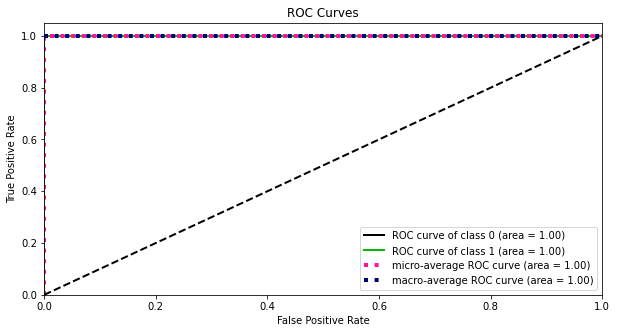

In [79]:
prob = bag_dt.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### XGBoost model instantiaing, training and evaluating

In [80]:
bag_xgb = BaggingClassifier(xgb.XGBClassifier(eval_metric = 'mlogloss'), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [81]:
bag_xgb.oob_score

True

In [82]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 0.8009478672985783


In [83]:
y_pred = bag_xgb.predict(x_test)

In [84]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       109
           1       0.76      0.85      0.81       102

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.81      0.80      0.80       211

------------------------------------------------------------



#### Conclusion : XGBoost model has 80% score

### Cross Validation score to check if the model is overfitting

In [85]:
cv = cross_val_score(bag_xgb, x, y, cv = 5)
print('Cross Validation score of XGBoost model --->', cv.mean())

Cross Validation score of XGBoost model ---> 0.8013461282153805


#### Conclusion : XGBoost model has 80% Cross Validation score

### ROC, AUC Curve

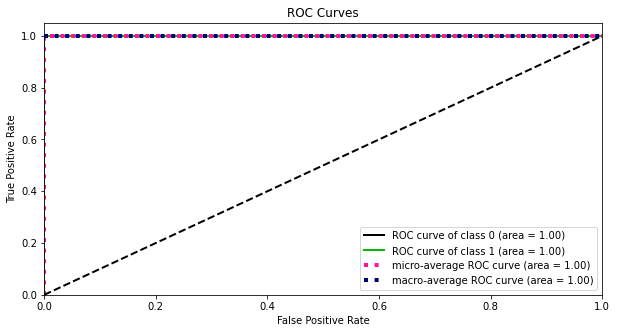

In [86]:
prob = bag_xgb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Knn model instantiaing, training and evaluating

In [87]:
bag_Knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [88]:
bag_Knn.oob_score

True

In [89]:
bag_Knn.fit(x_train, y_train)
print('Bagging KNN score ------->', bag_Knn.score(x_test, y_test))

Bagging KNN score -------> 0.5876777251184834


In [90]:
y_pred = bag_dt.predict(x_test)

In [91]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       109
           1       0.77      0.86      0.81       102

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

------------------------------------------------------------



#### Conclusion : KNN model has 81% score

### Cross Validation score to check if the model is overfitting

In [92]:
cv = cross_val_score(bag_Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.6742636278821805


#### Conclusion : Knn model has 67% Cross Validation score

### ROC, AUC Curve

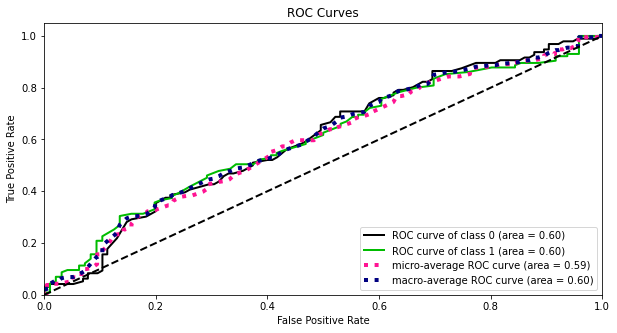

In [93]:
prob = bag_Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [94]:
bag_Rn = BaggingClassifier(RandomForestClassifier(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [95]:
bag_Rn.oob_score

True

In [96]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 0.8009478672985783


In [97]:
y_pred = bag_Rn.predict(x_test)

In [98]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       109
           1       0.75      0.87      0.81       102

    accuracy                           0.80       211
   macro avg       0.81      0.80      0.80       211
weighted avg       0.81      0.80      0.80       211

------------------------------------------------------------



#### Conclusion : Random Forest model has 80% score

### Cross Validation score to check if the model is overfitting

In [99]:
cv = cross_val_score(bag_Rn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.8078501932560309


#### Conclusion : Random Forest model has 80% Cross Validation score

### ROC, AUC Curve

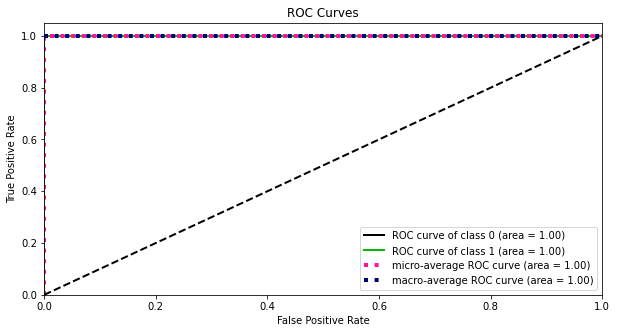

In [100]:
prob = bag_Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Logistic Regression model instantiaing, training and evaluating

In [101]:
bag_Lr = BaggingClassifier(LogisticRegression(), n_estimators = 15, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [102]:
bag_Lr.oob_score

True

In [103]:
bag_Lr.fit(x_train, y_train)
print('Bagging Logostic Regression score ------->', bag_Lr.score(x_test, y_test))

Bagging Logostic Regression score -------> 0.7298578199052133


In [104]:
y_pred = bag_Lr.predict(x_test)

In [105]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       109
           1       0.72      0.73      0.72       102

    accuracy                           0.73       211
   macro avg       0.73      0.73      0.73       211
weighted avg       0.73      0.73      0.73       211

------------------------------------------------------------



#### Conclusion : Logistic Regression model has 73% score

### Cross Validation score to check if the model is overfitting

In [113]:
cv = cross_val_score(bag_Lr, x, y, cv = 5)
print('Cross Validation score of Logistic regression model --->', cv.mean())

Cross Validation score of Logistic regression model ---> 0.8062108489937359


#### Conclusion : Logistic Regression model has 80% Cross Validation score

### ROC, AUC Curve

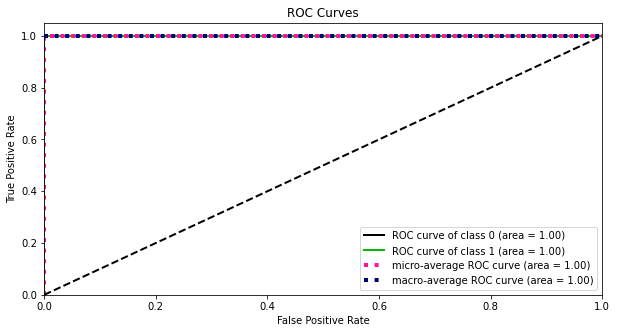

In [107]:
prob = bag_Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Let's find ROC, AUC score

In [108]:
# DecisionTreeClassifier
roc_auc_score(y_test, bag_dt.predict(x_test))

0.8075193380104335

In [109]:
# XGBoostClassifier
roc_auc_score(y_test, bag_xgb.predict(x_test))

0.8026173772261198

In [110]:
# KNeighborsClassifier
roc_auc_score(y_test, bag_Knn.predict(x_test))

0.5845475805000898

In [111]:
# RandomForestClassifier
roc_auc_score(y_test, bag_Rn.predict(x_test))

0.8032469868681418

### Let's check ROC, AUC Curve for the fitted model

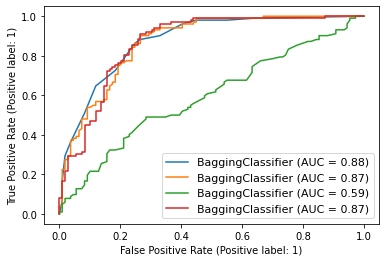

In [112]:
dis = plot_roc_curve(bag_dt, x_test, y_test)
plot_roc_curve(bag_Rn, x_test, y_test, ax = dis.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(bag_Knn, x_test, y_test, ax = dis.ax_)
plot_roc_curve(bag_xgb, x_test, y_test, ax = dis.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

### Looking CV score we found Random Forest has best model so we do Hyperparameter Tuning on it.

In [114]:
param = {'n_estimators': [50,100,750], 'max_samples': [1.0], 'bootstrap': [True]}

In [115]:
grid_search = GridSearchCV(estimator = Rn, param_grid = param, cv = 5 , n_jobs = -1)

In [116]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_samples=0.5, n_estimators=15,
                                         oob_score=True, random_state=3),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_samples': [1.0],
                         'n_estimators': [50, 100, 750]})

In [117]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 50}


In [118]:
hRn = BaggingClassifier(base_estimator=RandomForestClassifier(),max_samples = 1.0, bootstrap = True , n_estimators = 50)
hRn.fit(x_train, y_train)
hRn.score(x_test, y_test)

0.8056872037914692

In [119]:
y_pred = hRn.predict(x_test)

In [120]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       109
           1       0.77      0.86      0.81       102

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

------------------------------------------------------------



#### After doing Hyperparameter Tuning Precision Score is 85%.

### Saving The Model

In [129]:
# saving the model to the Local file system
filename = 'Loan Application Status Project.pickle'
pickle.dump(hRn, open(filename, 'wb'))

### Predict Loan Repayment 

In [130]:
model = pickle.load(open('Loan Application Status Project.pickle', 'rb'))

In [131]:
a = model.predict(x)
a

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [132]:
pred = pd.DataFrame(a)
pred

,0
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1
